In [1]:
# May cause deprecation warnings, safe to ignore, they aren't errors
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import desc
# Can only run this once. restart your kernel for any errors.
sc = SparkContext()

ssc = StreamingContext(sc, 10 )
sqlContext = SQLContext(sc)
socket_stream = ssc.socketTextStream("127.0.0.1", 5554)
lines = socket_stream.window( 20 )
from collections import namedtuple
fields = ("tag", "count" )
Tweet = namedtuple( 'Tweet', fields )
# Use Parenthesis for multiple lines or use \.
( lines.flatMap( lambda text: text.split( " " ) ) #Splits to a list
  .filter( lambda word: word.lower().startswith("#") ) # Checks for hashtag calls
  .map( lambda word: ( word.lower(), 1 ) ) # Lower cases the word
  .reduceByKey( lambda a, b: a + b ) # Reduces
  .map( lambda rec: Tweet( rec[0], rec[1] ) ) # Stores in a Tweet Object
  .foreachRDD( lambda rdd: rdd.toDF().sort( desc("count") ) # Sorts Them in a DF
  .limit(10).registerTempTable("tweets") ) ) # Registers to a table.

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/22 08:36:31 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
/opt/spark/python/pyspark/streaming/context.py:72: FutureWarning: DStream is deprecated as of Spark 3.4.0. Migrate to Structured Streaming.
  warnings.warn(
/opt/spark/python/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


__________
### Now run TweetListener.py
__________

In [3]:
ssc.start()    

24/05/22 08:39:34 WARN StreamingContext: StreamingContext has already been started
24/05/22 08:39:36 ERROR ReceiverTracker: Deregistered receiver for stream 0: Restarting receiver with delay 2000ms: Error connecting to 127.0.0.1:5554 - java.net.ConnectException: Connection refused (Connection refused)
	at java.base/java.net.PlainSocketImpl.socketConnect(Native Method)
	at java.base/java.net.AbstractPlainSocketImpl.doConnect(AbstractPlainSocketImpl.java:412)
	at java.base/java.net.AbstractPlainSocketImpl.connectToAddress(AbstractPlainSocketImpl.java:255)
	at java.base/java.net.AbstractPlainSocketImpl.connect(AbstractPlainSocketImpl.java:237)
	at java.base/java.net.SocksSocketImpl.connect(SocksSocketImpl.java:392)
	at java.base/java.net.Socket.connect(Socket.java:609)
	at java.base/java.net.Socket.connect(Socket.java:558)
	at java.base/java.net.Socket.<init>(Socket.java:454)
	at java.base/java.net.Socket.<init>(Socket.java:231)
	at org.apache.spark.streaming.dstream.SocketReceiver.onStar

In [3]:
import time
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns
# Only works for Jupyter Notebooks!
%matplotlib inline 

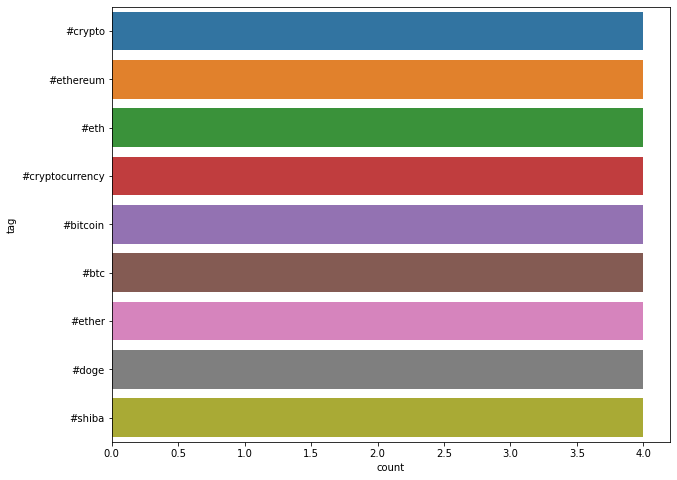

In [8]:
count = 0
while count < 10:
    
    time.sleep( 3 )
    top_10_tweets = sqlContext.sql( 'Select tag, count from tweets' )
    top_10_df = top_10_tweets.toPandas()
    display.clear_output(wait=True)
    plt.figure( figsize = ( 10, 8 ) )
#     sns.barplot(x='count',y='land_cover_specific', data=df, palette='Spectral')
    sns.barplot( x="count", y="tag", data=top_10_df)
    plt.show()
    count = count + 1

In [9]:
ssc.stop()